In [ ]:
# cost function
J = lambda x,y: (x**2 + 2.5*y**2)

In [41]:
# gradient functions
dJdx = lambda x: 2*x
dJdy = lambda y: 5*y

# learning rate
a = 0.1

# starting theta values
#th = np.random.uniform(-5, 5, 2)
th = [3, 4.5]
th

[3, 4.5]

In [42]:
def GradientDescent(iterations, gradient_fnts, learning_rate, initial_theta):
    theta = initial_theta
    yield theta
    for idx in range(iterations):
        new_th = []
        for j in range(len(gradient_fnts)):
            new_th.append(theta[j] - learning_rate*gradient_fnts[j](theta[j]))
        # the below expression is equivalent to the loop above
        #new_th = [(th - learning_rate*g(th)) for (g, th) in zip(gradient_fnts, theta)]
        yield new_th
        theta = new_th


In [62]:
thetas = [theta for theta in GradientDescent(20, [dJdx, dJdy], 0.1, th)]
Js = [J(th0, th1) for [th0, th1] in thetas]
thetas

[[3, 4.5],
 [2.4, 2.25],
 [1.92, 1.125],
 [1.536, 0.5625],
 [1.2288000000000001, 0.28125],
 [0.9830400000000001, 0.140625],
 [0.7864320000000001, 0.0703125],
 [0.6291456000000001, 0.03515625],
 [0.5033164800000001, 0.017578125],
 [0.40265318400000005, 0.0087890625],
 [0.32212254720000005, 0.00439453125],
 [0.25769803776000005, 0.002197265625],
 [0.20615843020800004, 0.0010986328125],
 [0.16492674416640002, 0.00054931640625],
 [0.13194139533312002, 0.000274658203125],
 [0.10555311626649602, 0.0001373291015625],
 [0.08444249301319681, 6.866455078125e-05],
 [0.06755399441055746, 3.4332275390625e-05],
 [0.05404319552844596, 1.71661376953125e-05],
 [0.04323455642275677, 8.58306884765625e-06],
 [0.03458764513820541, 4.291534423828125e-06]]

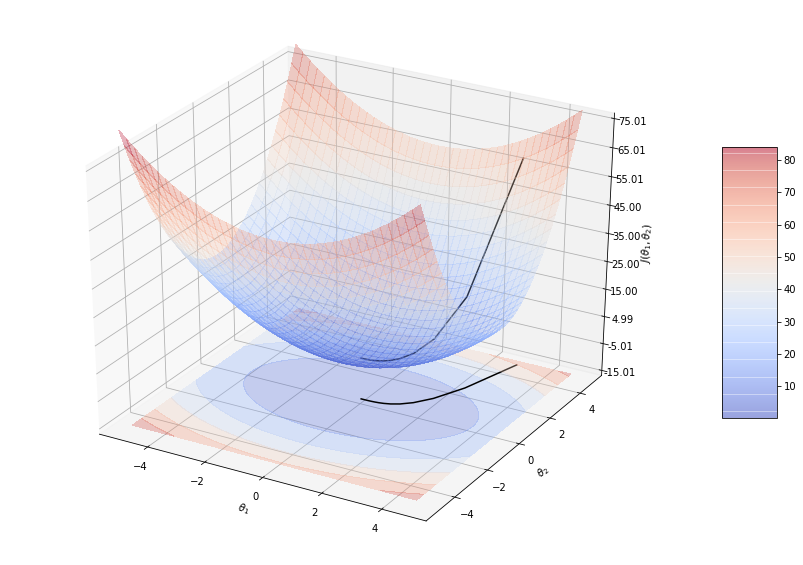

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Make data.
theta1 = np.arange(-5, 5, 0.25)
theta2 = np.arange(-5, 5, 0.25)
theta1,theta2 = np.meshgrid(theta1, theta2)

# Plot the surface.
Z = J(theta1,theta2)
surf = ax.plot_surface(theta1, theta2, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha = 0.3)

# Now plot the gradient descent
t1, t2 = zip(*thetas)
z_proj = [-15.01]*len(t1)

ax.plot(t1, t2, Js, color='black', alpha=1.0)
ax.plot(t1, t2, z_proj, zdir='z', color='black', alpha=1.0)

#project the distribution of J on to 2D
ax.contourf(theta1, theta2, Z, zdir='z', offset=-15.01, cmap=cm.coolwarm, alpha=0.3)

# Customize the z axis.
ax.set_zlim(-15.01, 75.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_2$')
ax.set_zlabel(r'$J(\theta_1, \theta_2)$')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
